In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras import models, layers, optimizers, regularizers
# from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

import cv2

import os

In [2]:
# Get photos for model training
# train = tf.keras.utils.image_dataset_from_directory('./data/archive/chest_xray/chest_xray/train')
# test = tf.keras.utils.image_dataset_from_directory('./data/archive/chest_xray/chest_xray/test')
# val = tf.keras.utils.image_dataset_from_directory('./data/archive/chest_xray/chest_xray/val')

In [3]:
def Get_Photo_Data(location, num_photos):
    '''
    Returns photos from data folder(resized, grayscaled) and binary class.
    
    '''
    datagen = ImageDataGenerator(rescale=1./255)
    
    data = datagen.flow_from_directory(
        location,
        target_size=(150, 150),
        batch_size=num_photos,
        color_mode='grayscale',
        class_mode='binary'
    )
    
    return data

In [4]:
#getting images and labels for models
train_photos = Get_Photo_Data('./data/archive/chest_xray/train/', 5216)
test_photos = Get_Photo_Data('./data/archive/chest_xray/test/', 624)
val_photos = Get_Photo_Data('./data/archive/chest_xray/val/', 16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
# unpack images and labels for CM/dummy model
train_data, train_labels = next (train_photos)
test_data, test_labels = next (test_photos)
val_data, val_labels = next (val_photos)

# Model 3
For this model we made the following changes:
1. Change input shape to (150, 150, 1), similar to dummy with function
2. Input layer nodes changed to 64


In [6]:
model = Sequential()

In [7]:
# Add layers to model
# input layer

model.add(Conv2D(64, (3,3), 1, activation='relu', padding = 'same', input_shape=(150,150,1)))

# add pooling layer(takes max from input window)
model.add(layers.MaxPooling2D((2,2)))

# flattens 2d to 1d
model.add(layers.Flatten())

# add dense layer
model.add(layers.Dense(16, activation='relu'))

# add output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# compile model with adam for binary model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy',
                                                                    Precision(name='precision'),
                                                                    Recall(name='recall')])

In [9]:
# fit model
history = model.fit(train_data,
               train_labels,
               batch_size=30,
               epochs=10,
               validation_data=(val_data, val_labels))

Epoch 1/10
174/174 [==============================] - 7s 15ms/step - loss: 0.2378 - accuracy: 0.9055 - precision: 0.9288 - recall: 0.9453 - val_loss: 0.4215 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 2/10
174/174 [==============================] - 2s 11ms/step - loss: 0.0762 - accuracy: 0.9732 - precision: 0.9814 - recall: 0.9825 - val_loss: 0.2672 - val_accuracy: 0.8750 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 3/10
174/174 [==============================] - 2s 11ms/step - loss: 0.0639 - accuracy: 0.9791 - precision: 0.9856 - recall: 0.9863 - val_loss: 0.1386 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 4/10
174/174 [==============================] - 2s 11ms/step - loss: 0.0380 - accuracy: 0.9868 - precision: 0.9912 - recall: 0.9910 - val_loss: 0.5137 - val_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/10
174/174 [==============================] - 2s 11ms/step - loss: 0.0244 - accuracy: 0.9941

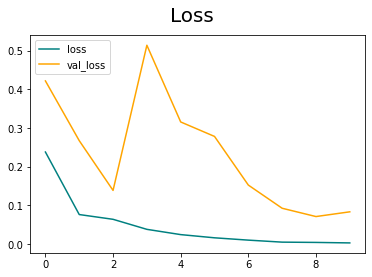

In [10]:
# examine loss of model across epochs
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

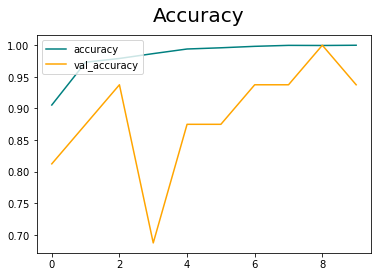

In [11]:
# examine accuracy of model across epochs
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [12]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [13]:
results=model.evaluate(test_data, test_labels)

20/20 [==============================] - 0s 6ms/step - loss: 1.5769 - accuracy: 0.7484 - precision: 0.7145 - recall: 0.9949


In [14]:
print(f"Model loss:  {results[0]}")
print(f"Model accuracy: {results[1]}")
print(f"Model precision: {results[2]}")
print(f"Model recall: {results[3]}")

Model loss:  1.5769387483596802
Model accuracy: 0.7483974099159241
Model precision: 0.7145488262176514
Model recall: 0.9948717951774597


### Model 3 summary
Performance metrics for model 3 has identical metrics to our FSM, but the model could run much faster.
<br> This means that we can continue to use the decreased photo size for future models.

Compared to our dummy model, we have increased performance across all metrics(Recall is the same):
<br> ----------------Precision-----Accuracy-----Recall
<br> DUMMY------0.63----------0.63---------1
<br> FSM,M3------0.71----------0.74---------0.98
<br> MODEL2-----0.63----------0.63---------1